# Практическое занятие №3

*П.Н. Советов, РТУ МИРЭА*

## 1. Модули

**1.1.** (уровень сложности: простейший)

Напишите код, состоящий из двух модулей, для получения следующего сообщения об ошибке:

```
AttributeError: partially initialized module '...' has no attribute '...' (most likely due to a circular import)
```

**1.2.** (уровень сложности: простейший)

Как вы думаете, модуль загружается один раз или же загружается каждый раз при очередном импорте? Докажите правильность вашей гипотезы примером кода.

**1.3.** (уровень сложности: простейший)

Предположим, мы хотим изменить значение глобальной переменной модуля, но так, чтобы новое значение отразилось на всех пользователях этого модуля. К чему приведет следующий код? Что можно предложить взамен?

```Python
from some_module import GLOBAL_VAR
GLOBAL_VAR = 42
```

**1.4.** (уровень сложности: простейший)

Неконтролируемый импорт с помощью *, как известно, в Питоне не поощряется. Попробуйте сделать его контролируемым со стороны модуля. Использование звездочки не должно приводить к импорту всех глобальных имен вашего модуля.

**1.5.** (уровень сложности: низкий)

Напишите функцию load_config(filename) для загрузки скрипта на Питоне в виде программируемого конфигурационного формата. Приведите плюсы и минусы подходов с использованием импорта и прямого выполнения кода.

**1.6.** (уровень сложности: средний)

Создайте учебный пакет, состоящий из нескольких модулей и JSON-файла. Получите дистрибутив, готовый для установки с помощью pip. Проверьте результат установки в виртуальном окружении.

**Все дальнейшие задачи делаются в Jupyter-блокноте с использованием библиотеки Matplotlib.**

## 2. Процедурная графика

**2.1.** (уровень сложности: средний)

Создайте генератор случайных спрайтов 5x5 пикселей. Используйте свойство симметрии. Вывод реализуйте с помощью функции imshow.

Пример работы генератора показан ниже.

![](data/sprite1.png)

**2.2.** (уровень сложности: средний)

Создайте генератор карт спрайтов. Пример работы этого генератора показан ниже.


![](data/sprite2.png)

**2.3.** (уровень сложности: высокий)

Реализуйте генератор случайных спрайтов NxM. Используйте различные свойства симметрии. Добавьте цвета.

Пример работы этого генератора показан ниже.


![](data/sprite3.png)

Использовалась палитра из PICO-8:

```
1D2B53
7E2553
008751
AB5236
5F574F
C2C3C7
FFF1E8
FF004D
FFA300
FFEC27
00E436
29ADFF
83769C
FF77A8
FFCCAA
```

**2.4.** (уровень сложности: высокий)

Слышали ли вы об играх с процедурно сгенерированными вселенными? Оказывается, у современной Elite Dangerous есть далекий предок – игра Elite 1984 года. В Elite была впечатляющая по тем временам 3d графика и целых 8 галактик для исследования, каждая из которых содержала 256 солнечных систем. Удивительно, но все это работало на 8-битном компьютере, а код игры составлял микроскопические 32 Кбайт.

Изобразите легендарную первую галактику из игры Elite. Для этого потребуется портировать алгоритм процедурной генерации, приведенный далее на C/C++. Обратите внимание, [этот код](http://www.iancgbell.clara.net/elite/text/) написан в низкоуровневом стиле, поскольку был получен из оригинальной игры, которая, в свою очередь, была написана на языке ассемблера. Вам необходимо при портировании следовать хорошему стилю написания программ на Питоне.

Каждая галактика в игре генерируется на основе всего трех 16-битных чисел w0, w1 и w2. Для первой галактики это 0x5A4A, 0x0248 и 0xB753. Имена звезд генерируются с помощью массива слогов.

```C
char pairs[] = "..LEXEGEZACEBISO"
"USESARMAINDIREA."
"ERATENBERALAVETI"
"EDORQUANTEISRION"; /* Dots should be nullprint characters */

typedef struct
{
 uint x;
 uint y; /* One byte unsigned */
 uint economy; /* These two are actually only 0-7 */
 uint govtype;
 uint techlev; /* 0-16 i think */
 uint population; /* One byte */
 uint productivity; /* Two byte */
 uint radius; /* Two byte (not used by game at all) */
 fastseedtype goatsoupseed;
 char name[12];
} plansys;

void tweakseed(seedtype *s)
{
 uint16 temp;
 temp = ((*s).w0) + ((*s).w1) + ((*s).w2); /* 2 byte aritmetic */
 (*s).w0 = (*s).w1;
 (*s).w1 = (*s).w2;
 (*s).w2 = temp;
}

/**-Generate system info from seed **/

plansys makesystem(seedtype *s)
{
 plansys thissys;
 uint pair1, pair2, pair3, pair4;
 uint16 longnameflag = ((*s).w0) & 64;

 thissys.x = (((*s).w1) >> 8);
 thissys.y = (((*s).w0) >> 8);

 thissys.govtype = ((((*s).w1) >> 3) & 7); /* bits 3,4 &5 of w1 */

 thissys.economy = ((((*s).w0) >> 8) & 7); /* bits 8,9 &A of w0 */
 if (thissys.govtype <= 1)
 {
 thissys.economy = ((thissys.economy) | 2);
 }

 thissys.techlev = ((((*s).w1) >> 8) & 3) + ((thissys.economy) ^ 7);
 thissys.techlev += ((thissys.govtype) >> 1);
 if (((thissys.govtype) & 1) == 1) thissys.techlev += 1;
 /* C simulation of 6502's LSR then ADC */

 thissys.population = 4 * (thissys.techlev) + (thissys.economy);
 thissys.population += (thissys.govtype) + 1;

 thissys.productivity = (((thissys.economy) ^ 7) + 3)*((thissys.govtype) + 4);
 thissys.productivity *= (thissys.population) * 8;

 thissys.radius = 256 * (((((*s).w2) >> 8) & 15) + 11) + thissys.x;

 thissys.goatsoupseed.a = (*s).w1 & 0xFF;;
 thissys.goatsoupseed.b = (*s).w1 >> 8;
 thissys.goatsoupseed.c = (*s).w2 & 0xFF;
 thissys.goatsoupseed.d = (*s).w2 >> 8;

 pair1 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair2 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair3 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair4 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 /* Always four iterations of random number */

 (thissys.name)[0] = pairs[pair1];
 (thissys.name)[1] = pairs[pair1 + 1];
 (thissys.name)[2] = pairs[pair2];
 (thissys.name)[3] = pairs[pair2 + 1];
 (thissys.name)[4] = pairs[pair3];
 (thissys.name)[5] = pairs[pair3 + 1];

 if (longnameflag) /* bit 6 of ORIGINAL w0 flags a four-pair name */
 {
 (thissys.name)[6] = pairs[pair4];
 (thissys.name)[7] = pairs[pair4 + 1];
 (thissys.name)[8] = 0;
 }
 else (thissys.name)[6] = 0;
 stripout(thissys.name, '.');

 return thissys;
}
```

Описание первой галактики можно найти [здесь](https://wiki.alioth.net/index.php/Oolite_planet_list/Galaxy_1).

Ниже показан пример визуализации первой галактики.

![](data/galaxy.png)

**2.5.** (уровень сложности: высокий)

Создайте генератор растений с помощью алгоритма освоения пространства (space colonization algorithm). Этот алгоритм описан в [статье](http://algorithmicbotany.org/papers/colonization.egwnp2007.large.pdf) 2007 года и позволяет моделировать различные природные явления: корни и ветви деревьев, сети рек и дорог и так далее.

Основная идея алгоритма состоит в том, чтобы разместить в некоторой области случайным образом точки притяжения. К этим точкам на каждой итерации тянутся узлы моделируемого растения или дерева. В процессе создаются ветки, а точки поглощаются.

Алгоритм содержит следующие шаги.

1. Создание N случайных точек притяжения, а также одного или нескольких начальных узлов дерева.
2. Поглощение ближайших точек притяжения – то есть тех точек, которые находятся к узлам дерева ближе, чем расстояние $d_k$.
3. Нахождение для каждой точки притяжения ближайшего к ней узла дерева $v$ на дистанции, не превышающей $d_i$. Для каждого $v$ формируется множество $S(v)$, которое может содержать несколько точек притяжения.
4. Если $S(v)$ не пусто, то формируется очередной узел $v'$ на расстоянии $D$ и создается новый сегмент $(v, v')$ с помощью следующих формул:
$$
v' = v + \hat{n}D, \hat{n} = \frac{\vec{n}}{\lVert\vec{n}\rVert},\vec{n} = \sum_{s \in S(v)} \frac{s - v}{\lVert s - v \rVert}
$$
5. Переход на шаг 2, пока не исчерпано заданное число шагов.

Для изображения сегментов используйте LineCollection из Matplotlib.

Ниже приведен пример сгенерированного растения.

![](data/plant1.png)

Растения могут расти совместно:

![](data/plant2.png)

**2.6.** (уровень сложности: высокий)

Создайте генератор деревьев на основе алгоритма освоения пространства. Деревья должны иметь ствол и листья. Примеры автоматически сгенерированных деревьев показаны далее:

![](data/tree1.png)

![](data/tree2.png)

![](data/tree3.png)

**2.7.** (уровень сложности: низкий)

Реализуйте функцию, которая по имени графического файла возвращает двумерный массив с помощью списков Питона, содержащий RGB-значения картинки. Эта функция понадобится для решения остальных задач этого раздела.

**2.8.** (уровень сложности: средний)

Диаграммы Вороного находят широкое применение не только в математике, но и, к примеру, в архитектуре, а также в процедурной графике. Названы эти диаграммы в честь русского математика [Георгия Феодосьевича Вороного](https://www.mathnet.ru/links/bd2cf5586728b0e7a7393c5d7cc7b23d/cheb698.pdf). Для создания диаграммы Вороного необходимо выбрать множество точек и разбить плоскость (n-мерный случай рассматривать не будем) на области, для каждой из которых только одна из выбранных точек окажется ближайшей.

Мы используем диаграммы Вороного для реализации фильтра изображения. Результат фильтрации может напоминать нарисованную кистью картину или мозаику. Для получения результата необходимо выбрать N случайных точек исходного изображения и построить по ним диаграмму.

Существуют различные алгоритмы построения диаграмм Вороного, но мы воспользуемся самым примитивным подходом – просто последуем определению и переберем все координаты изображения-результата на предмет расстояния до случайно выбранных точек исходного изображения.

Ниже показано исходное изображение:

![](data/winter1.jpg)

Результат фильтрации для N = 500:

![](data/winter2.png)

Результат фильтрации для N = 2000:

![](data/winter3.png)

**2.9.** (уровень сложности: хакер)

Ускорьте фильтрацию с помощью диаграмм Вороного не меня принципиально алгоритм и не используя сторонние библиотеки.

**2.10.** (уровень сложности: средний)

Реализуйте простой [алгоритм](https://github.com/s-macke/VoxelSpace) трехмерной визуализации воксельных ландшафтов на основе текстуры и карты высот.

Исходные данные: [текстура](data/texture.png), [карта высот](data/heightmap.png).

Идея алгоритма заключается в послойном сканировании, одна горизонтальная линия за другой, значений из текстуры с учетом дистанции от камеры, и размещении на экране каждой точки слоя в виде столбца, высота которого извлекается из карты высот, а цвет – из текстуры.


Изобразите на текстуре область обзора, охватываемого камерой. Для этого потребуется знать координаты камеры (x, y), ширину зкрана (screen_width) и глубину обзора (z):

![](data/voxel_info.png)

Сканирование начинайте от наиболее удаленного от камеры слоя.

Пример (x = 500, y = 900, screen_width = 64, z = 400):

![](data/voxel1.png)

**2.11.** (уровень сложности: средний)

Изобразите текстуру в трехмерном пространстве, используя за основу алгоритм, реализованный в предыдущей задаче. Вам потребуется написать функцию для изображения вертикальных линий. Как и ранее, используйте алгоритм художника – то есть начинайте рисовать от наиболее отдаленных слоев. Цвет линии извлекается из текстуры, а высота текстуры масштабируется с учетом z и переменной, задающей положение горизонта (horizon).

Пример:

![](data/voxel2.png)

**2.12.** (уровень сложности: средний)

Изобразите трехмерный ландшафт с использованием доработанного алгоритма из предыдущей задачи. Теперь необходимо задавать высоту вертикальных линий, учитывая карту высот.

Пример:

![](data/voxel3.png)

**2.13.** (уровень сложности: высокий)

Ускорьте визуализацию трехмерного ландшафта из предыдущей задачи. Идея: начинайте рисование от ближайшего слоя и храните текущую строку со значениями высот, чтобы не перерисовывать то, что находится за пределами видимости.

**2.14.** (уровень сложности: высокий)

Создайте генератор текстур и карт высот. Для этого можно, к примеру, использовать метод фрактального шума из практического занятия №1.

Простой пример:

![](data/voxel4.jpg)


**2.15.** (уровень сложности: хакер)

Реализуйте анимацию полета по трехмерному ландшафту, добейтесь приемлемой частоты кадров в секунду.

## 3. Инфографика

In [1]:
import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# Сообщения, присланные в ЦАП.
# id, task, variant, group, time
messages = load_csv('messages.csv')

# Результаты проверок сообщений, присланных в ЦАП.
# id, message, time, status
checks = load_csv('checks.csv')

# Состояния задач ЦАП.
# task, variant, group, time, status, achievements
statuses = load_csv('statuses.csv')

# Таблица соответствия номеров групп и их названий.
# id, title
groups = load_csv('groups.csv')

# 3.1 Как по дням недели распределяется активность студентов?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import ast

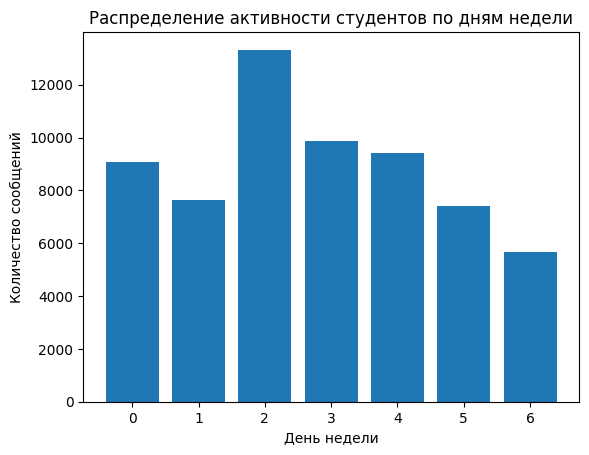

In [3]:
messages_time = [parse_time(row[4]) for row in messages]

weekday_counts = {}
for message_time in messages_time:
    weekday = message_time.weekday()
    weekday_counts[weekday] = weekday_counts.get(weekday, 0) + 1

plt.bar(weekday_counts.keys(), weekday_counts.values())
plt.xlabel("День недели")
plt.ylabel("Количество сообщений")
plt.title("Распределение активности студентов по дням недели")
plt.show()

# 3.2 Как по времени суток распределяется активность студентов?

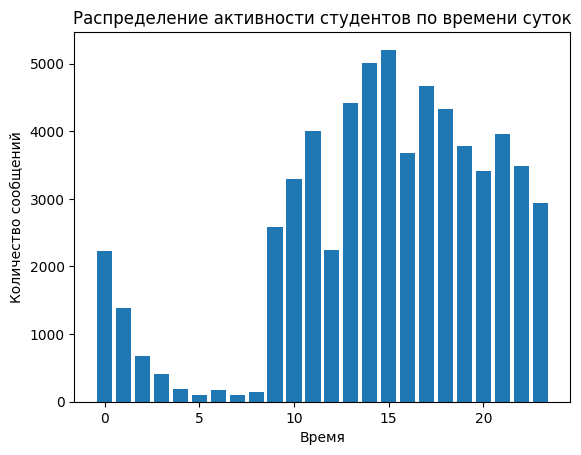

In [4]:
messages_time = [parse_time(row[4]) for row in messages]

hour_counts = {}
for message_time in messages_time:
    hour = message_time.hour
    hour_counts[hour] = hour_counts.get(hour, 0) + 1

plt.bar(hour_counts.keys(), hour_counts.values())
plt.xlabel("Время")
plt.ylabel("Количество сообщений")
plt.title("Распределение активности студентов по времени суток")
plt.show()

In [5]:
messages_df = pd.read_csv('messages.csv', header=None, names=['id', 'task', 'variant', 'group', 'time'])
statuses_df = pd.read_csv('statuses.csv', header=None, names=['task', 'variant', 'group', 'time', 'status', 'achievements'])
groups_df = pd.read_csv('groups.csv', header=None, names=['id', 'title'])

# 3.3 Сколько сообщений в среднем студенты отправляют по каждой задаче

Среднее количество сообщений по каждой задаче: 7800.38


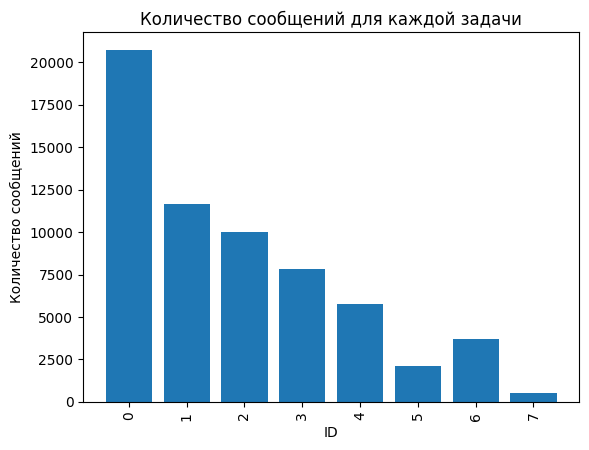

In [6]:
messages_per_task = messages_df.groupby('task').size()

average_messages_per_task = messages_per_task.mean()

print(f'Среднее количество сообщений по каждой задаче: {average_messages_per_task:.2f}')

plt.bar(messages_per_task.index.astype(str), messages_per_task.values)
plt.title('Количество сообщений для каждой задачи')
plt.xlabel('ID')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=90)
plt.show()


# 3.4 Как за период с начала семестра менялась активность студентов по каждой из задачи

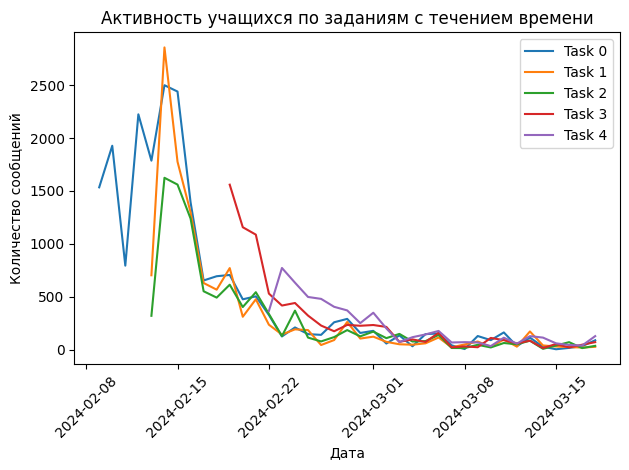

In [7]:
messages_df['time'] = pd.to_datetime(messages_df['time'])

messages_by_task_and_day = messages_df.groupby(['task', messages_df['time'].dt.date]).size().reset_index(name='count')


for task in messages_by_task_and_day['task'].unique()[:5]:
    task_data = messages_by_task_and_day[messages_by_task_and_day['task'] == task]
    plt.plot(task_data['time'], task_data['count'], label=f'Task {task}')

plt.title('Активность учащихся по заданиям с течением времени')
plt.xlabel('Дата')
plt.ylabel('Количество сообщений')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  3.5 В каких группах было отправлено больше всего сообщений?

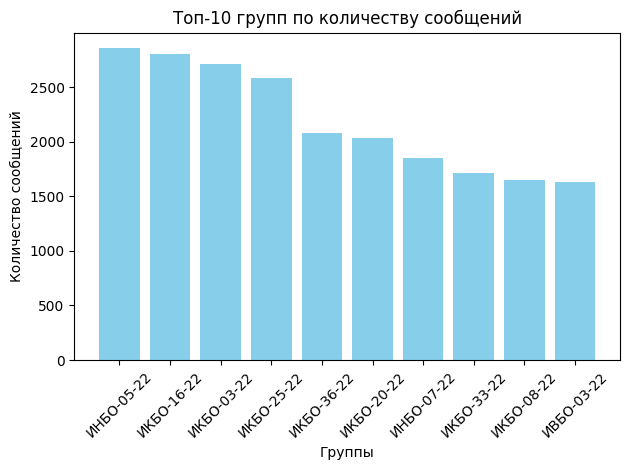

In [8]:
messages_per_group = messages_df.groupby('group').size().reset_index(name='message_count')

messages_per_group = messages_per_group.merge(groups_df, left_on='group', right_on='id')

messages_per_group_sorted = messages_per_group.sort_values(by='message_count', ascending=False)
top_groups = messages_per_group_sorted.head(10)

plt.bar(top_groups['title'], top_groups['message_count'], color='skyblue')
plt.title('Топ-10 групп по количеству сообщений')
plt.xlabel('Группы')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.6 В каких группах было получено больше всего правильных решений?

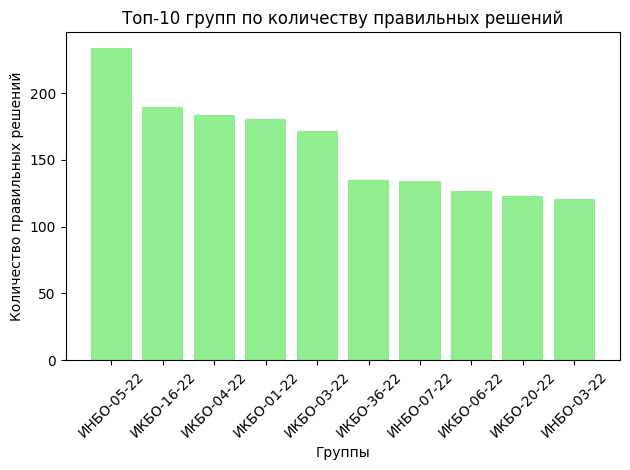

In [9]:
correct_statuses = statuses_df[statuses_df['status'] == 2]

correct_counts_per_group = correct_statuses.groupby('group').size().reset_index(name='correct_count')

correct_counts_per_group = correct_counts_per_group.merge(groups_df, left_on='group', right_on='id')

correct_counts_per_group_sorted = correct_counts_per_group.sort_values(by='correct_count', ascending=False)

top_correct_groups = correct_counts_per_group_sorted.head(10)

plt.bar(top_correct_groups['title'], top_correct_groups['correct_count'], color='lightgreen')
plt.title('Топ-10 групп по количеству правильных решений')
plt.xlabel('Группы')
plt.ylabel('Количество правильных решений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.7 Какие задачи оказались самыми легкими, самыми сложными

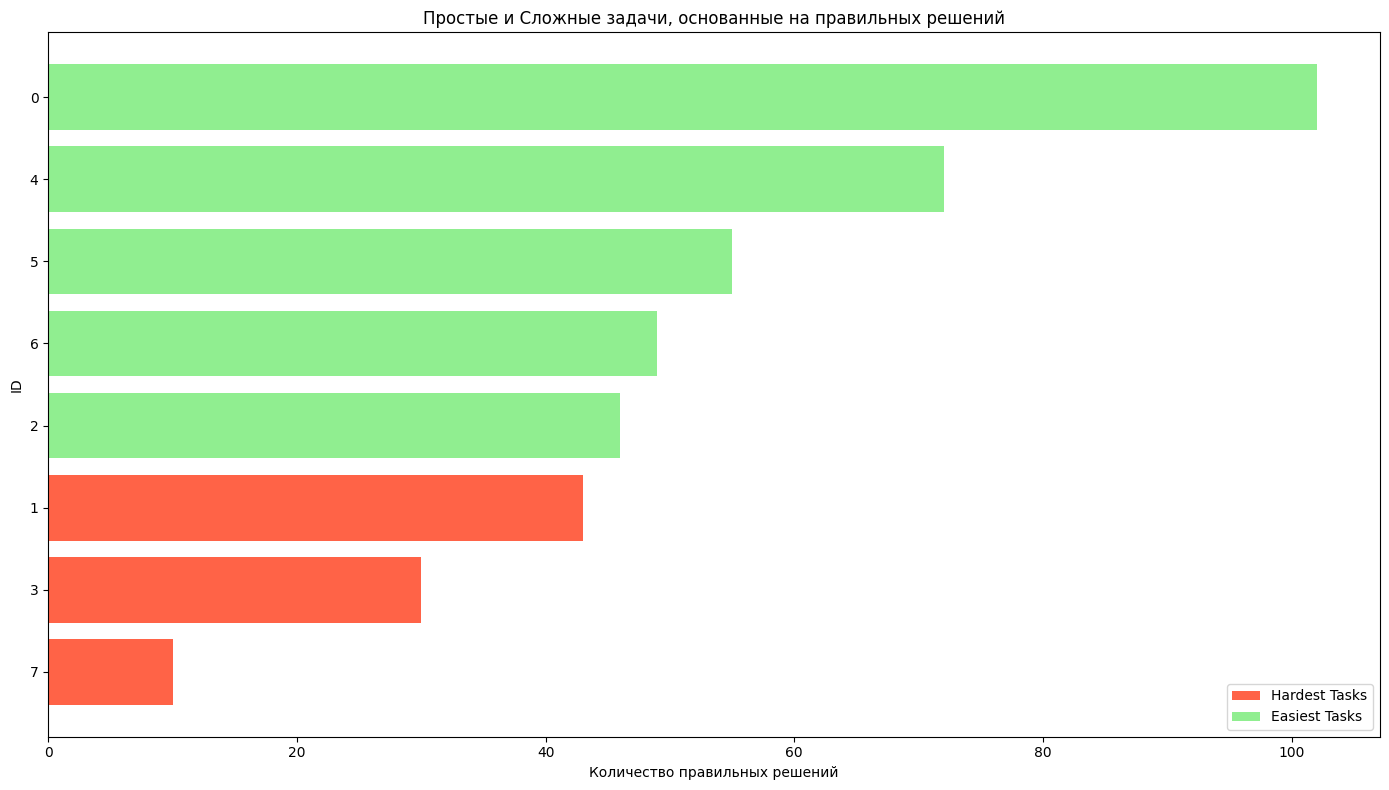

In [10]:
correct_statuses = statuses_df[statuses_df['status'] == 3]

correct_counts_per_task = correct_statuses.groupby('task').size().reset_index(name='correct_count')
easiest_tasks = correct_counts_per_task.sort_values(by='correct_count', ascending=False).head()

hardest_tasks = correct_counts_per_task.sort_values(by='correct_count', ascending=True).head()
correct_counts_per_task = statuses_df[statuses_df['status'] == 3].groupby('task').size().reset_index(name='correct_count')

correct_counts_per_task_sorted = correct_counts_per_task.sort_values(by='correct_count', ascending=True)

easiest_tasks = correct_counts_per_task_sorted.tail(5)
hardest_tasks = correct_counts_per_task_sorted.head(5)

plt.figure(figsize=(14, 8))

plt.barh(hardest_tasks['task'].astype(str), hardest_tasks['correct_count'], color='tomato', label='Hardest Tasks')

plt.barh(easiest_tasks['task'].astype(str), easiest_tasks['correct_count'], color='lightgreen', label='Easiest Tasks')

plt.xlabel('Количество правильных решений')
plt.ylabel('ID')
plt.title('Простые и Сложные задачи, основанные на правильных решений')
plt.legend()
plt.tight_layout()
plt.show()


# 3.8 Студенты каких групп заработали больше всего достижений?

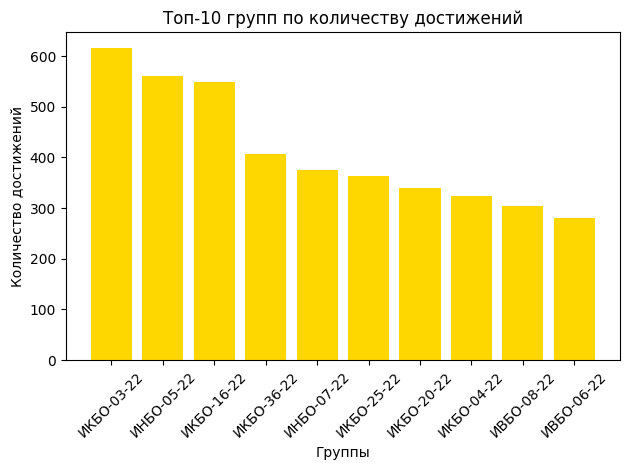

In [11]:
statuses_df['achievements'] = statuses_df['achievements'].apply(ast.literal_eval)

statuses_df['achievement_count'] = statuses_df['achievements'].apply(len)

achievements_per_group = statuses_df.groupby('group')['achievement_count'].sum().reset_index()

achievements_per_group = achievements_per_group.merge(groups_df, left_on='group', right_on='id')

achievements_per_group_sorted = achievements_per_group.sort_values(by='achievement_count', ascending=False)

top_achieving_groups = achievements_per_group_sorted.head(10)

plt.bar(top_achieving_groups['title'], top_achieving_groups['achievement_count'], color='gold')
plt.title('Топ-10 групп по количеству достижений')
plt.xlabel('Группы')
plt.ylabel('Количество достижений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.9 Кто находится на первых 10 местах в рейтинге сутдентов?

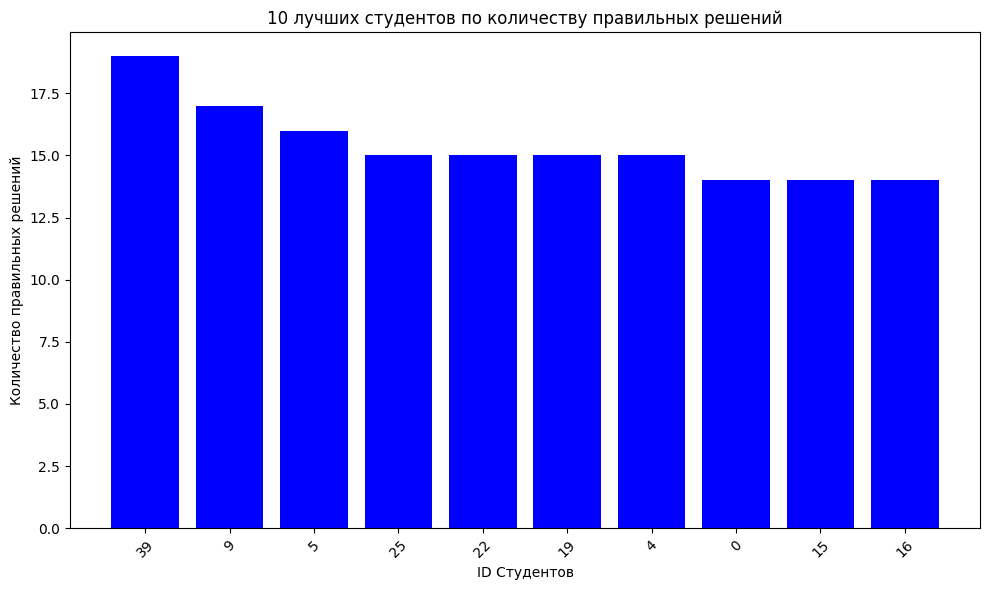

In [12]:
correct_solutions = statuses_df[statuses_df['status'] == 3]

student_success = correct_solutions.groupby('variant').size().reset_index(name='correct_solutions_count')

top_students = student_success.sort_values(by='correct_solutions_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_students['variant'].astype(str), top_students['correct_solutions_count'], color='blue')
plt.title('10 лучших студентов по количеству правильных решений')
plt.xlabel('ID Студентов')
plt.ylabel('Количество правильных решений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3.10 В каких группах студенты чаще решают задачи различными способами?

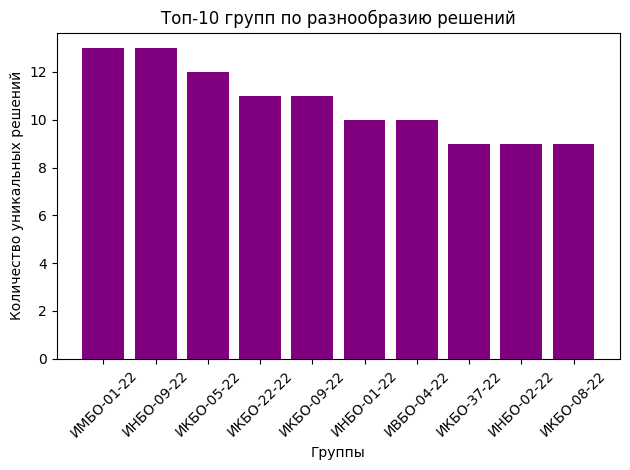

In [13]:
correct_solutions = statuses_df[statuses_df['status'] == 3]

unique_solutions_per_group = correct_solutions.groupby('group')['variant'].nunique().reset_index(name='unique_solutions_count')

unique_solutions_per_group = unique_solutions_per_group.merge(groups_df, left_on='group', right_on='id')

unique_solutions_per_group_sorted = unique_solutions_per_group.sort_values(by='unique_solutions_count', ascending=False)

top_diverse_groups = unique_solutions_per_group_sorted.head(10)

plt.bar(top_diverse_groups['title'], top_diverse_groups['unique_solutions_count'], color='purple')
plt.title('Топ-10 групп по разнообразию решений')
plt.xlabel('Группы')
plt.ylabel('Количество уникальных решений')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.9.** (уровень сложности: средний)

Кто находится на первых 10 местах в рейтинге студентов?

**3.10.** (уровень сложности: средний)

В каких группах студенты чаще решают задачи различными способами?


Проанализируйте [базу данных](https://github.com/Newbilius/Old-Games_DOS_Game_Gauntlet/blob/master/GAMES.csv) старых компьютерных игр.

С помощью графиков ответьте на следующие вопросы:

**3.11.** (уровень сложности: средний)

Какие годы были самыми популярными с точки зрения выхода игр?

**3.12.** (уровень сложности: средний)

Какие жанры были популярны в различные периоды времени?